In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
pd.set_option("display.width",None) 
sns.axes_style("whitegrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [40]:
df = pd.read_csv('train.csv')

In [41]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
mc = df.corr()

In [43]:
nldf = mc.nlargest(6, 'SalePrice')
nldf = nldf.T
ydf = mc.nlargest(6, 'SalePrice')
ydf

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


In [44]:
minidf = pd.concat([df['SalePrice'], df['OverallQual']], axis = 1)
px.box(minidf, x= 'OverallQual', y = 'SalePrice', color = 'OverallQual')


In [45]:
bucleg = df.filter(items=['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'SalePrice'])

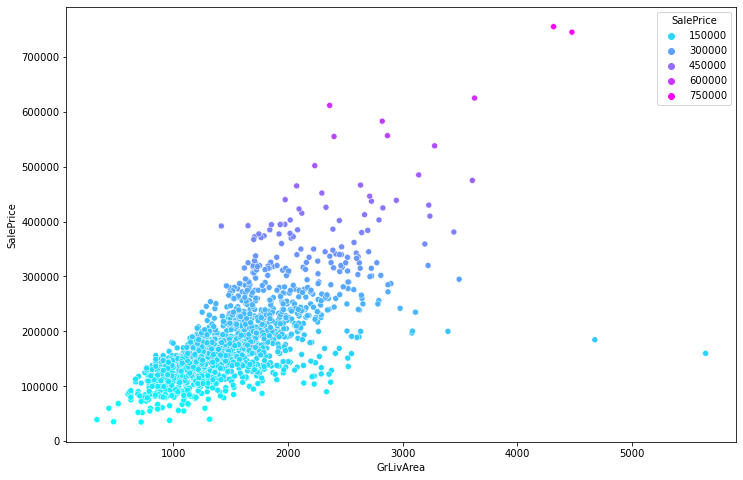

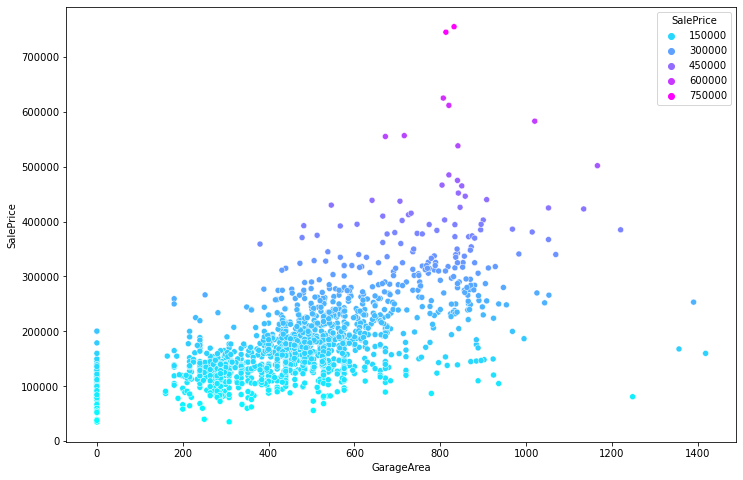

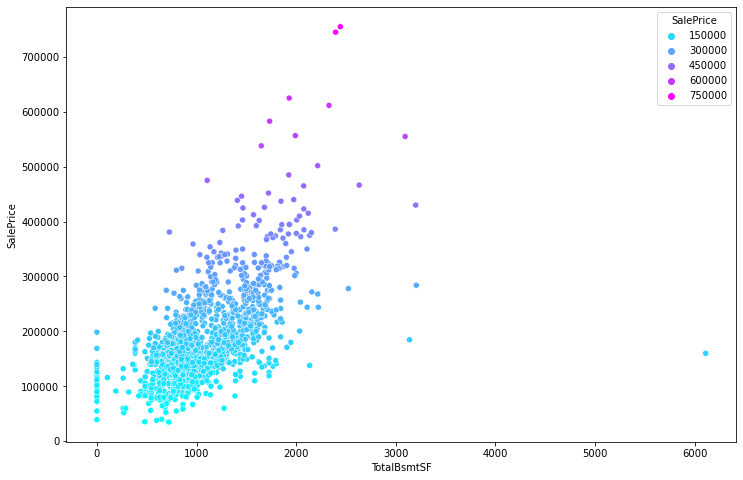

In [46]:
for columna in bucleg[['GrLivArea', 'GarageArea', 'TotalBsmtSF']]:
    fig = plt.figure(figsize=(12,8))
    axes = sns.scatterplot(data = bucleg, x= columna, y = 'SalePrice', hue='SalePrice', palette='cool')

In [47]:
df.data = pd.concat([df['OverallQual'], df['GrLivArea'], df['GarageArea'], df['TotalBsmtSF']], axis = 1) 
california_data= np.array(df.data)
california_data.shape
california_target = np.array(df['SalePrice'])

C:\Users\sorac\AppData\Local\Temp\ipykernel_19732\3666628596.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [48]:
df.data

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF
0,7,1710,548,856
1,6,1262,460,1262
2,7,1786,608,920
3,7,1717,642,756
4,8,2198,836,1145
...,...,...,...,...
1455,6,1647,460,953
1456,6,2073,500,1542
1457,7,2340,252,1152
1458,5,1078,240,1078


In [49]:
x_train, x_test, y_train, y_test = train_test_split(california_data, california_target, random_state=11)

In [50]:
x_train.shape

(1095, 4)

In [51]:
x_test.shape

(365, 4)

In [52]:
reglin = LinearRegression()

In [53]:
reglin.fit(X=x_train, y = y_train)

LinearRegression()

In [54]:
for i,name in enumerate(df.data):
    print(f'{name}: {reglin.coef_[i]}')

OverallQual: 25540.92507527097
GrLivArea: 40.39568107460191
GarageArea: 64.04991873214894
TotalBsmtSF: 26.238678589467387


In [55]:
prediccion = reglin.predict(x_test)
valor_esperado = y_test


In [56]:
Regresion_lineal = pd.DataFrame()
Regresion_lineal['Valor de Predicccion'] = pd.Series(prediccion)
Regresion_lineal['Valor Esperado'] = pd.Series(valor_esperado)

In [57]:
Regresion_lineal

,Valor de Predicccion,Valor Esperado
0,84650.630613,87000
1,200745.948442,175500
2,47165.328631,82500
3,92640.622336,107000
4,249296.253431,392500
...,...,...
360,200267.271071,169500
361,167826.731165,179900
362,109624.822538,133900
363,136281.039813,138887


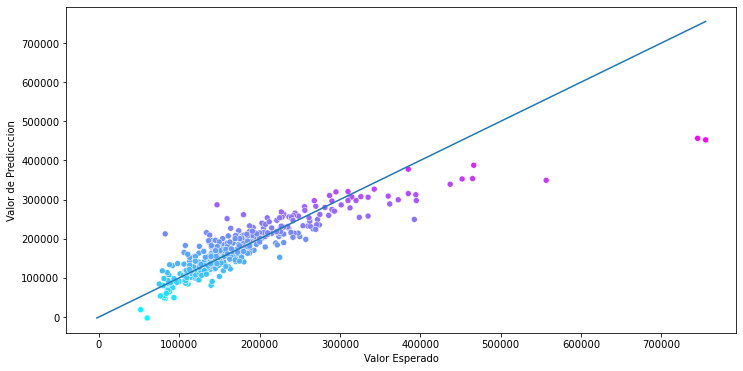

In [58]:
figure = plt.figure(figsize=(12,6))
axes = sns.scatterplot(data=Regresion_lineal, x='Valor Esperado', y='Valor de Predicccion', hue = 'Valor de Predicccion', palette= 'cool', legend=False)
start = min(valor_esperado.min(), prediccion.min())
end = max(valor_esperado.max(), prediccion.max())
line = plt.plot([start,end], [start,end])

In [59]:
metrics.r2_score(valor_esperado, prediccion)

0.7763928489082799